<a href="https://colab.research.google.com/github/f-bndk/test_completed/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1. SQL

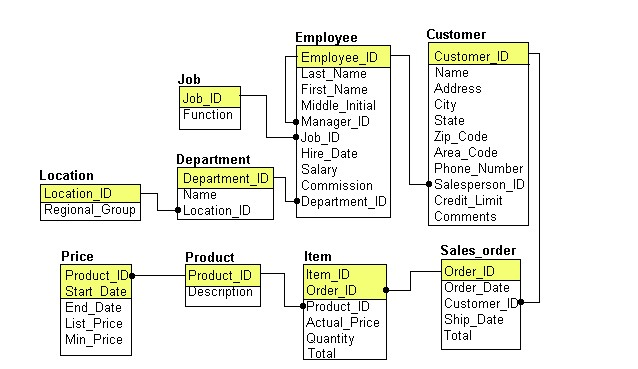

**Первые 20 заданий необходимо выполнять без использования соединений таблиц, в оставшихся 20 соединения таблиц и подзапросы допускаются**

In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psycopg2
import pandas as pd

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

**Пример запроса (не забывайте указывать da. перед названием таблицы):**

In [ ]:
pd.read_sql_query("""
SELECT
employee_id,
hire_date,
age(current_date, hire_date) as year_work_true,
extract(year from age(current_date, hire_date)) as year_work,
extract(month from age(current_date, hire_date)) as month_work,
extract(day from age(current_date, hire_date)) as days_work
from da.employee
""", conn)

### Задание 1
Выбрать коды всех городов, в которых расположены отделы фирмы.

In [ ]:
pd.read_sql_query("""
select
  zip_code
  from da.customer
where city in
  (select
    regional_group
    from da.location)
""", conn)

### Задание 2
Для каждого сотрудника определить, какой процент по отношению к зарплате составляют его комиссионные.

In [ ]:
pd.read_sql_query("""
select
  last_name,
  case
    when commission = 0
    then 0
    when commission is null
    then 0
    else round(salary/commission)
    end as percentage
  from da.employee
order by last_name
""", conn)

### Задание 3
Вывести два инициала (с точками) и фамилии всех сотрудников

In [ ]:
pd.read_sql_query("""
select
  concat (last_name, ' ', middle_initial, '.', substr(first_name, 1, 1), '.')
  from da.employee
""", conn)

### Задание 4
По каждой сделке вывести точную сумму сделки, сумму сделки, округленную в большую сторону, округленную в меньшую сторону, округленную по общепринятым правилами округления.

In [ ]:
pd.read_sql_query("""
select
  order_id,
  actual_price,
  ceil(actual_price) as round_up,
  floor(actual_price) as round_down,
  round(actual_price) as common_round
  from da.item
""", conn)

### Задание 5
Выбрать фамилии всех сотрудников, у которых комиссионные больше зарплаты.

In [ ]:
pd.read_sql_query("""
select last_name from da.employee where (coalesce(commission)>salary)
""", conn)

### Задание 6
Выбрать фамилии всех сотрудников, фамилии которых начинаются на букву 'S'.

In [ ]:
pd.read_sql_query("""
select last_name from da.employee where last_name like 'S%'
""", conn)

### Задание 7
Выбрать имена всех сотрудников, которые не являются менеджерами (job_id=671) и не работают в отделе SALES в NEW YORK (department_id=13).

In [ ]:
pd.read_sql_query("""
select
  last_name,
  first_name
  from da.employee
where job_id!=671 AND department_id not in
  (select
    department_id
    from da.department
  where location_id not in
     (select
      location_id
      from da.location
    where regional_group = 'NEW YORK'))
""", conn)

### Задание 8
Выбрать фамилии всех сотрудников, у которых код должности 667 или 670 (CLERK или SALESPERSON).

In [ ]:
pd.read_sql_query("""
select
  last_name
  from da.employee
where job_id in
  (select
    job_id
    from da.job
  where function = 'CLERK' OR function = 'SALESPERSON')
""", conn)

### Задание 9
Выбрать всех сотрудников, имена которых состоят из 6 букв и начинаются на 'MAR'.

In [ ]:
pd.read_sql_query("""
select
  first_name
  from da.employee
where length(first_name)=6 AND first_name like 'MAR%'
""", conn)

,first_name
0,MARION


### Задание 10
Выбрать фамилии всех сотрудников, которые поступили на работу после 15 апреля 1985 года.

In [ ]:
pd.read_sql_query("""
select
  last_name
  from da.employee
where hire_date > '1985-04-15'
""", conn)

### Задание 11
Выбрать фамилии всех сотрудников, которые поступили на работу в 1985 году.

In [ ]:
pd.read_sql_query("""
select
  last_name
  from da.employee
where hire_date between '1985-01-01' and '1985-12-31'
""", conn)

### Задание 12
Для каждого сотрудника выбрать количество **полных** лет работы в фирме.

In [ ]:
pd.read_sql_query("""
select
  last_name,
  extract(year from age(current_date, hire_date)) as year_work
  from da.employee
order by year_work
""", conn)

,last_name,year_work
0,ADAMS,36.0
1,SCOTT,36.0
2,MURRAY,36.0
3,ROBERTS,36.0
4,DOUGLAS,36.0
5,FISHER,36.0
6,JENSEN,36.0
7,SHAW,37.0
8,DUNCAN,37.0
9,LANGE,37.0


### Задание 13
Выбрать количество сотрудников, получающих комиссионные. Если сотрудник получает 0 комиссионных, то это тоже считается. Не считаются только NULL.

In [ ]:
pd.read_sql_query("""
select
  last_name,
  commission from da.employee
where commission is not NULL or commission = 0
""", conn)

,last_name,commission
0,ALLEN,300.0
1,WARD,500.0
2,PETERS,300.0
3,SHAW,1200.0
4,LANGE,300.0
5,PORTER,900.0
6,MARTIN,1400.0
7,WEST,1000.0
8,ROSS,800.0
9,TURNER,0.0


### Задание 14
Выбрать количество и общую сумму сделок, совершенных с покупателем, код которого - 104.

In [ ]:
pd.read_sql_query("""
select
  count(*) as "amount of transactions",
  sum(total)
  from da.sales_order
where customer_id = 104
""", conn)

,amount of transactions,sum
0,4,7160.8


### Задание 15
Выбрать среднюю зарплату по каждой должности.

In [ ]:
pd.read_sql_query("""
select
  function,
  avg (salary) as avg_salary
  from da.employee e, da.job
where e.job_id in
  (select
    job_id
    from da.job)
group by function
""", conn)

,function,avg_salary
0,STAFF,1896.875
1,CLERK,1896.875
2,PRESIDENT,1896.875
3,MANAGER,1896.875
4,ANALYST,1896.875
5,SALESPERSON,1896.875


### Задание 16
Выбрать среднюю зарплата продавцов (код должности - 670).

In [ ]:
pd.read_sql_query("""
select
  avg(salary) as avg_salary_of_salesperson
  from da.employee
where job_id =
  (select
    job_id
    from da.job
  where job_id = 670)
""", conn)

### Задание 17
 Выбрать средние зарплаты продавцов (код должности - 670) и клерков (код должности - 667).

In [ ]:
pd.read_sql_query("""
select
  job_id,
  avg(salary) as avg_salary_of_clerks_and_sales
  from da.employee
where job_id in
  (select
    job_id
    from da.job
  where job_id = 670 or job_id = 667)
group by job_id
""", conn)

### Задание 18
Выбрать коды продуктов, по которым было совершено меньше 10 продаж (фактов продаж, не кол-во проданных продуктов).



In [ ]:
pd.read_sql_query("""
select
  product_id
  from da.product
where product_id in
  (select
    product_id
    from da.item
  where order_id in
    (select
      order_id
      from da.sales_order
    where total<10))
""", conn)

,product_id
0,100871
1,102130


### Задание 19
Выбрать максимальную зарплату продавцов (код должности - 670) по каждому отделу.

In [ ]:
pd.read_sql_query("""
select
  department_id,
  max(salary) as max_sales_salary
  from da.employee
where job_id in
  (select job_id from da.job where job_id = 670)
group by department_id
""", conn)

### Задание 20
Выбрать список сотрудников фирмы в алфавитном порядке.

In [ ]:
pd.read_sql_query("""
select
  concat (last_name, ' ', middle_initial, '.', substr(first_name, 1, 1), '.')
  from da.employee
order by last_name asc
""", conn)


### Задание 21
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
select
	department_id,
  name,
  d.location_id,
  l.location_id,
  regional_group
	from da.department d, da.location l
where
	d.location_id = l.location_id
""", conn)

### Задание 22
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
select
  last_name,
  function,
  regional_group
  from da.employee as e, da.department as d, da.location as l, da.job as j
where
  e.department_id = d.department_id and d.location_id = l.location_id and e.job_id = j.job_id
""", conn)

### Задание 23
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
select
  last_name,
  customer_id,
  name
  from da.employee as e, da.customer as c
where
  last_name = 'TURNER' and e.employee_id = c.salesperson_id
""", conn)

### Задание 24
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
select
  last_name, employee_id, customer_id
  from da.employee as e
left join da.customer as c
  on e.employee_id = c.salesperson_id
    where c.salesperson_id is NULL
order by last_name asc
""", conn)

### Задание 25
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query("""
select
  salesperson_id,
  last_name,
  name from da.customer, da.employee
  where salesperson_id=employee_id
order by last_name
""", conn)

### Задание 26
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query("""
select
  sum(actual_price) as "Turner's sales sum"
  from da.employee as e, da.customer as c, da.sales_order as so, da.item as i
where
  last_name = 'TURNER' AND e.employee_id = c.salesperson_id AND c.customer_id = so.customer_id AND so.order_id = i.order_id
""", conn)

,turner's sales sum
0,413.0


### Задание 27
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г. Будьте внимательны с выбором total? Ответьте себе на вопрос: нужен total из таблицы item или из таблицы sales_order, почему?

In [ ]:
pd.read_sql_query("""
select
  description, sum(so.total) "Tennis related merchandise sold"
  from da.product as p
join da.item as i
  on p.product_id = i.product_id
join da.sales_order as so
  on i.order_id = so.order_id
where description like '%TENNIS%'
group by description
""", conn)

,description,Tennis related merchandise sold
0,"RH: ""GUIDE TO TENNIS""",61221.4
1,ACE TENNIS RACKET I,84731.2
2,SP TENNIS RACKET,61179.2
3,ACE TENNIS BALLS-6 PACK,84580.8
4,ACE TENNIS NET,56353.9
5,ACE TENNIS BALLS-3 PACK,84230.9
6,ACE TENNIS RACKET II,66722.5


### Задание 28
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query("""
select last_name, salary from da.employee where hire_date =
  (select max(hire_date) from da.employee)

--Получается выбрать имена и зарплаты самого старого ИЛИ самого молодого сотрудника (подзапрос или через limit), но не обоих
""", conn)


,last_name,salary
0,MURRAY,750.0


### Задание 29
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме (только продавцов, это отдельная должность).

In [ ]:
pd.read_sql_query("""
select
  first_name, last_name, (salary-avg_salary) as difference
  from da.employee as s1
join (select
        job_id, round(avg(salary)) as avg_salary
        from da.employee
        group by job_id) as s2
  on s1.job_id = s2.job_id
where s1.job_id = 670
""", conn)

,first_name,last_name,difference
0,KEVIN,ALLEN,268.0
1,CYNTHIA,WARD,-82.0
2,DANIEL,PETERS,-82.0
3,KAREN,SHAW,-82.0
4,SARAH,DUNCAN,-82.0
5,GREGORY,LANGE,-82.0
6,RAYMOND,PORTER,-82.0
7,KENNETH,MARTIN,-82.0
8,LIVIA,WEST,168.0
9,PAUL,ROSS,-32.0


### Задание 30
Вывести имена, средние инициалы и фамилии всех однофамильцев. (Удобно использовать подзапрос)

In [ ]:
pd.read_sql_query("""
select
  first_name,
  middle_initial,
  last_name
  from da.employee where last_name in
  (select
    last_name
    from da.employee
    group by last_name having count(last_name)>1)
""", conn)

,first_name,middle_initial,last_name


### Задание 31
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query("""
with e1 as
  (select
    round(count(*)) as cnt,
    sum(salary) as sal_sum
  from da.employee)
select
  e2.department_id,
  100*count(*)/e1.cnt as employees_percentage,
  round(100*sum(e2.salary)/e1.sal_sum, 3) as salary_percentage
from da.employee as e2
cross join e1
group by e2.department_id, e1.cnt, e1.sal_sum

--скопировано с решения из консультации
""", conn)

,department_id,employees_percentage,salary_percentage
0,13,15.625,12.109
1,24,3.125,2.965
2,12,12.500,15.939
3,34,3.125,3.048
4,14,3.125,3.624
5,20,15.625,17.916
6,30,18.750,15.486
7,10,9.375,14.415
8,43,3.125,2.142
9,23,15.625,12.356


### Задание 32
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

Здесь предлагается следовать следующей логике:

Выбрать коды всех сотрудников, которые являются начальниками ->

Выбрать коды начальников для всех, чьи коды вошли в предыдущую выборку ->

Выбрать имена всех, чьи коды вошли в предыдущую выборку

In [ ]:
pd.read_sql_query("""
select
  last_name
  from da.employee
where employee_id in
 (select
    manager_id
    from da.employee
  where employee_id in
    (select
      manager_id
      from da.employee)
  )
""", conn)

,last_name
0,JONES
1,ALBERTS
2,KING


### Задание 33
Выбрать название отдела, заключившего сделки на самую большую сумму, и города, в котором он находится. Здесь удобно применить подзапросы, хотя можно сделать и с помощью соединений таблиц.

In [ ]:
pd.read_sql_query("""
WITH tbl
    AS (SELECT Max(total) s_max
        FROM   da.sales_order)
SELECT regional_group,
       d.NAME
FROM   tbl,
       da.location AS l
       JOIN da.department AS d
         ON l.location_id = d.location_id
       JOIN da.employee AS e
         ON d.department_id = e.department_id
       JOIN da.customer AS c
         ON e.employee_id = c.salesperson_id
       JOIN da.sales_order AS so
         ON c.customer_id = so.customer_id
WHERE  so.total = tbl.s_max
""", conn)

,regional_group,name
0,CHICAGO,SALES


### Задание 34
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

**В заданиях подобным этому, не забудьте о том как действует цена в этой базе: она действует от price.start_date до price.end_date, причем если price.end_date IS NULL, то цена действует до сих пор!**

### Задание 35
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

**Скидка здесь это list_price*quantity-item.total**

### Задание 36
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого. С помощью alias-ов можно соединять таблицы сами с собой

In [ ]:
pd.read_sql_query("""
select
  t1.last_name as manager,
  t2.last_name as subordinate
  from da.employee as t1, da.employee as t2
where t2.manager_id = t1.employee_id
order by manager
""", conn)

### Задание 37
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query("""
WITH tbl
     AS (SELECT function,
                Round(Avg(salary)) AS av_sal
         FROM   da.employee e,
                da.job j
         WHERE  e.job_id = j.job_id
         GROUP  BY function)
SELECT e2.last_name,
       j2.function,
       t.av_sal,
       salary - t.av_sal AS difference
FROM   da.employee e2
       JOIN da.job j2
         ON e2.job_id = j2.job_id
       JOIN tbl t
         ON t.function = j2.function
ORDER  BY function
""", conn)

### Задание 38
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам. (объем продаж в деньгах)



### Задание 39
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

Нужно учесть случай, когда либо зарплата, либо комиссионные IS NULL, поскольку сама по себе зарплата или сами по себе комиссионные могут быть уже больше 2000, а любое число + NULL как мы знаем дает NULL.

In [ ]:
pd.read_sql_query("""
select last_name from da.employee where true in
(select
  case
    when commission is null and salary>2000
    then true
    when salary is null and commission>2000
    then true
    when commission+salary > 2000
    then true
    else false
  end)
order by last_name
""", conn)

,last_name
0,ALBERTS
1,BAKER
2,BLAKE
3,CLARK
4,DENNIS
5,DOYLE
6,FISHER
7,FORD
8,JONES
9,KING


### Задание 40
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

Здесь удобно делать задачу по частям

1. Получите цену на 15 декабря 1989г.
2. Получите цену, действующую сейчас
3. Соедините эти два запроса

Сравнивать тут нужно только list_price.

In [ ]:
pd.read_sql_query("""
select product_id, list_price from da.price as p1 where '1989-12-15' between start_date and coalesce(end_date, now());
select product_id, list_price from da.price where end_date is null

-- здесь я не понимаю как соединить запросы в каждом из которых есть WHERE. Возможно первый запрос можно использовать с WITH,
-- а цену на сегодня вывести аттрибутом не используя WHERE, но я не знаю как это сделать.
-- Дальше как соединять и по каким условиям мне понятно

""", conn)